# Detrending `eleanor` lightcurves using `lightkurve`

We would like to use `lightkurve` detrending procedures on `eleanor`-generated lightcurves. To do this, we will extract the lightcurve of a star (WASP-100b in this example) using `eleanor` and store it as a TPF file. Then we will load the TPF file into `lightkurve` and detrend it.

In [49]:
import os

EXOPLANET = "WASP-100"
FITS_NAME = EXOPLANET+"-raw.fits"
FITS_PATH = os.getcwd() # This is kinda cheap and doesn't always work. 
    # If it fails, replace it with the path of the directory that contains this notebook.

## Extracting the `eleanor` lightcurve

In [18]:
import eleanor
from IPython.display import Image
from matplotlib import pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

First, we will find the star and load the data.

In [10]:
star = eleanor.Source(name=EXOPLANET, sector=1)

INFO: Found cached file /home/jtdinsmo/.eleanor/mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0902-1078_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0902-1078_tess_v2_bkg.fits with expected size 78955200. [astroquery.query]
INFO: Found cached file /home/jtdinsmo/.eleanor/mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0902-1078_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0902-1078_tess_v2_pc.fits with expected size 158022720. [astroquery.query]
INFO: Found cached file /home/jtdinsmo/.eleanor/mastDownload/HLSP/hlsp_eleanor_tess_ffi_postcard-s0001-4-1-cal-0902-1078_tess_v2_pc/hlsp_eleanor_tess_ffi_postcard-s0001-4-1_tess_v2_pm.txt with expected size 237847. [astroquery.query]


Then, we will get the lightcurve, using `eleanor`'s background subtraction. We can choose our own aperture if we want, but we can also let `eleanor` choose for us. Both options are provided below.

In [32]:
CUSTOM_APERTURE = False

data = eleanor.TargetData(star, height=15, width=15, bkg_size=31, do_psf=True, do_pca=True)
if CUSTOM_APERTURE:
    eleanor.TargetData.custom_aperture(data, shape='circle', r=2, pos=[7,6], method='exact')
    eleanor.TargetData.get_lightcurve(data)
    
q = data.quality == 0

100%|██████████| 1282/1282 [00:17<00:00, 74.52it/s]


Then we can display the lightcurve and chosen aperture.

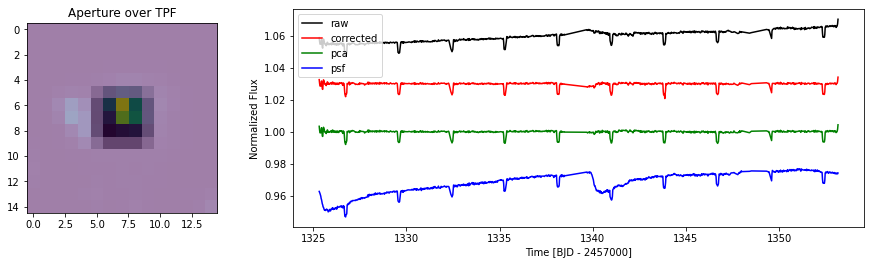

In [33]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,4), gridspec_kw={'width_ratios':[1,3]})
ax1.imshow(data.tpf[0])
ax1.imshow(data.aperture, cmap='Greys', alpha=0.5)
ax1.set_title('Aperture over TPF')

plt.plot(data.time[q], data.raw_flux[q]/np.nanmedian(data.raw_flux[q])+0.06, 'k', label="raw")
plt.plot(data.time[q], data.corr_flux[q]/np.nanmedian(data.corr_flux[q]) + 0.03, 'r', label="corrected")
plt.plot(data.time[q], data.pca_flux[q]/np.nanmedian(data.pca_flux[q]), 'g', label="pca")
plt.plot(data.time[q], data.psf_flux[q]/np.nanmedian(data.psf_flux[q]) - 0.03, 'b', label="psf")

ax2.legend()
ax2.set_xlabel('Time [BJD - 2457000]')
ax2.set_ylabel('Normalized Flux');

Finally, we wish to save the subtracted data as a TPF file.

I'm not actually certain that the output file format is actually TPF. It might be a FITS file.

In [50]:
data.save(output_fn=FITS_NAME, directory=FITS_PATH)

## Load the file using `lightkurve`

In [69]:
import lightkurve as lk

In [71]:
lcf = lk.lightcurvefile.LightCurveFile(FITS_PATH+'/'+FITS_NAME)

AttributeError: 'LightCurveFile' object has no attribute 'download'

AttributeError: 'LightCurveFile' object has no attribute 'get_lightcurve'

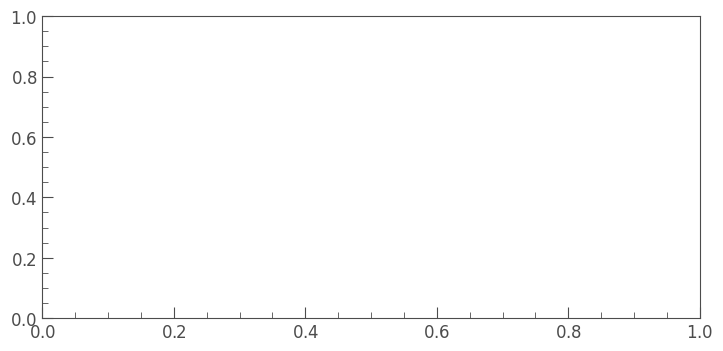

In [74]:
lcf.plot()